# 필요한 package import

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt


# tensorflow 2 및 keras import

In [2]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras

print('tf version:', tf.__version__)
print('keras version:', keras.__version__)


TensorFlow 2.x selected.
tf version: 2.1.0
keras version: 2.2.4-tf


In [0]:
# to make this notebook's output stable across runs
np.random.seed(42)

# Data Load

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

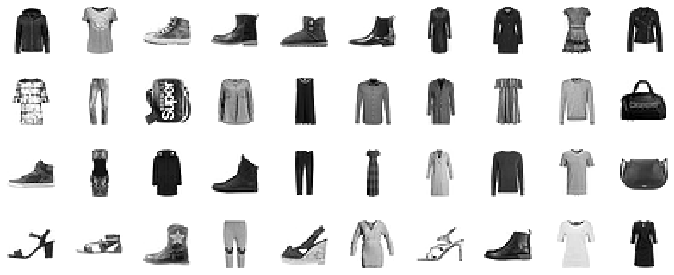

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

# Keras로 딥러닝 모델 만들기 

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


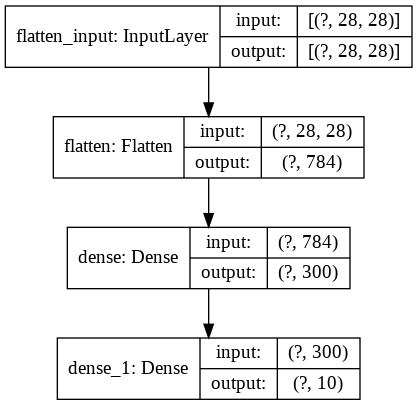

In [14]:
keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.layers

In [16]:
model.layers[1]

In [17]:
model.layers[1].name

'dense'

In [18]:
model.get_layer(model.layers[1].name)

# 모델 학습 시키기

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=4,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/4
55000/55000 [==============================] - 6s 110us/sample - loss: 0.7293 - accuracy: 0.7658 - val_loss: 0.5344 - val_accuracy: 0.8212
Epoch 2/4
55000/55000 [==============================] - 6s 101us/sample - loss: 0.5118 - accuracy: 0.8261 - val_loss: 0.4713 - val_accuracy: 0.8410
Epoch 3/4
 4640/55000 [=>............................] - ETA: 5s - loss: 0.4581 - accuracy: 0.8429

In [0]:
weights, biases = model.layers[1].get_weights()

In [0]:
weights

In [0]:
weights.shape

In [0]:
biases

In [0]:
biases.shape

In [0]:
history.params

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [0]:
model.evaluate(X_test, y_test)

In [0]:
X_new = X_test[:2]
X_new.shape

In [0]:
y_proba = model.predict(X_new)
y_proba

In [0]:
y_pred = model.predict_classes(X_new)
y_pred

# Saving and Restoring

In [0]:
model.save("my_keras_model.h5")

In [0]:
model = keras.models.load_model("my_keras_model.h5")

In [0]:
model.save_weights("my_keras_weights.ckpt")

In [0]:
model.load_weights("my_keras_weights.ckpt")

# Sequential VS Functional

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
flatten_ = keras.layers.Flatten(input_shape=[28, 28])(input_)
hidden1 = keras.layers.Dense(300, activation="relu")(flatten_)
output = keras.layers.Dense(10, activation="softmax")(hidden1)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [0]:
keras.utils.plot_model(model, show_shapes=True)